In [1]:
#source /export/ciao/bin/ciao.bash -o
PFILES="./param;$ASCDS_INSTALL/param:$ASCDS_INSTALL/contrib/param"
mkdir -p ./param
ASCDS_WORK_PATH=./


In [2]:
/bin/rm -rf 635
download_chandra_obsid 635 evt2,fov
mv -fv 635/primary/*fits.gz .
rmdir -p 635/primary


  Type     Format      Size  0........H.........1  Download Time Average Rate
  ---------------------------------------------------------------------------
  evt2     fits       17 Mb  ####################          < 1 s  85173.0 kb/s
  fov      fits        8 Kb  ####################          < 1 s  540.3 kb/s

      Total download size for ObsId 635 = 17 Mb
      Total download time for ObsId 635 = < 1 s

'635/primary/acisf00635N005_evt2.fits.gz' -> './acisf00635N005_evt2.fits.gz'
'635/primary/acisf00635_000N005_fov1.fits.gz' -> './acisf00635_000N005_fov1.fits.gz'


In [3]:
dmcopy "acisf00635N005_evt2.fits.gz[energy=500:7000,sky=region(acisf00635_000N005_fov1.fits.gz)][bin sky=2]" img.fits clob+

In [4]:
dmlist img.fits cols

 
--------------------------------------------------------------------------------
Columns for Image Block EVENTS_IMAGE
--------------------------------------------------------------------------------
 
ColNo  Name                 Unit        Type             Range
   1   EVENTS_IMAGE[1779,1470]              Int2(1779x1470) -                    
 
--------------------------------------------------------------------------------
Physical Axis Transforms for Image Block EVENTS_IMAGE
--------------------------------------------------------------------------------
 
Group# Axis# 
   1   1,2    sky(x) = (+2799.2220) +(+2.0)* ((#1)-(+0.50))
                 (y)   (+2887.9247)  (+2.0)  ((#2) (+0.50))
 
--------------------------------------------------------------------------------
World Coordinate Axis Transforms for Image Block EVENTS_IMAGE
--------------------------------------------------------------------------------
 
Group# Axis# 
   1   1,2    EQPOS(RA ) = (+246.8259)[deg] +TAN[(-0.000

[1] 3392
[1]+  Done                    ds9 img.fits -scale log -scale limits 0 50 -zoom to fit -saveimage png ds9_01.png


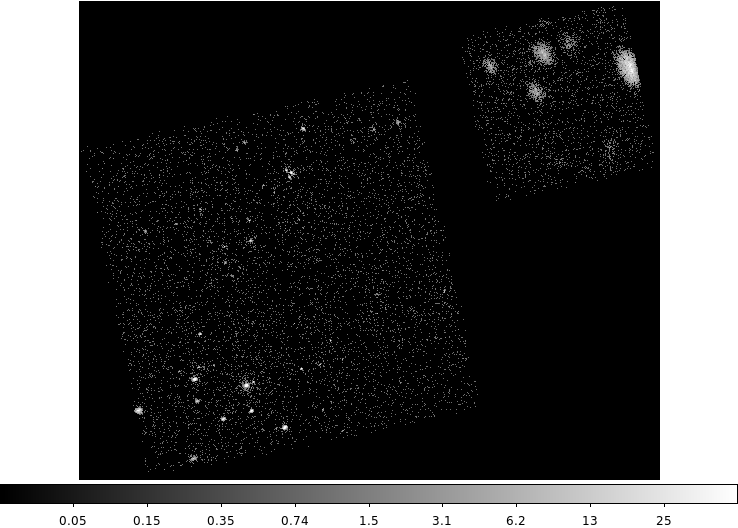

In [5]:
ds9 img.fits -scale log -scale limits 0 50 -zoom to fit \
  -saveimage png ds9_01.png &
sleep 10
xpaset -p ds9 quit

display < ds9_01.png

## Determine size of "the" psf

In [6]:
mkpsfmap infile=img.fits outfile=psfmap.fits energy=2.3 ecf=0.9 units=logical clob+

[1] 3473
[1]+  Done                    ds9 psfmap.fits -scale log -zoom to fit -cmap load $ASCDS_CONTRIB/data/16_colors.lut -saveimage png ds9_02.png


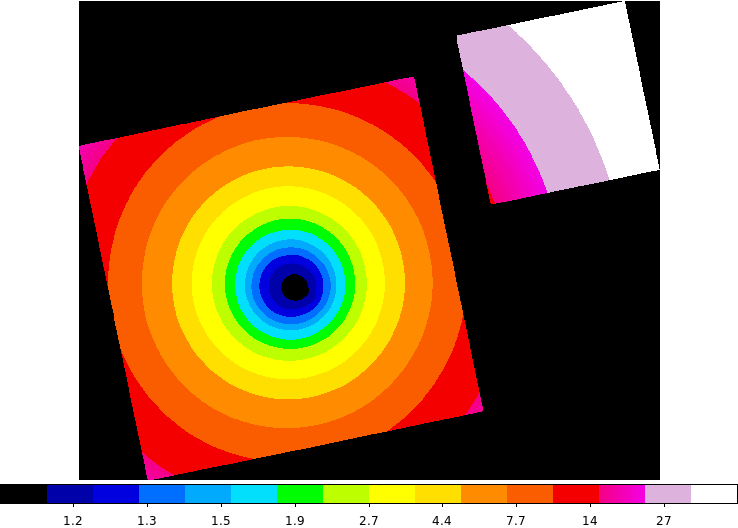

In [7]:

#  -mode crosshair -crosshair 4096 4096 physical -view graph horizontal yes 

ds9 psfmap.fits -scale log -zoom to fit  \
  -cmap load $ASCDS_CONTRIB/data/16_colors.lut \
  -saveimage png ds9_02.png &
sleep 10
xpaset -p ds9 quit

display < ds9_02.png

## Truncate values

In [8]:
dmimgcalc psfmap.fits none trunk_psf.fits op="imgout=((int)(img1*10.0))/10.0" cl+

In [9]:
dmimgthresh trunk_psf.fits tt_psf.fits cut=0.1 value=0.1 cl+


## Adaptive smooth

In [10]:
dmimgadapt infile=img.fits outfile=sm_img.fits function=cone \
 inradfile=tt_psf.fits mode=h clob+ verb=0

[1] 3711
[1]+  Done                    ds9 sm_img.fits -scale log -scale limits 0 50 -zoom to fit -saveimage png ds9_03.png


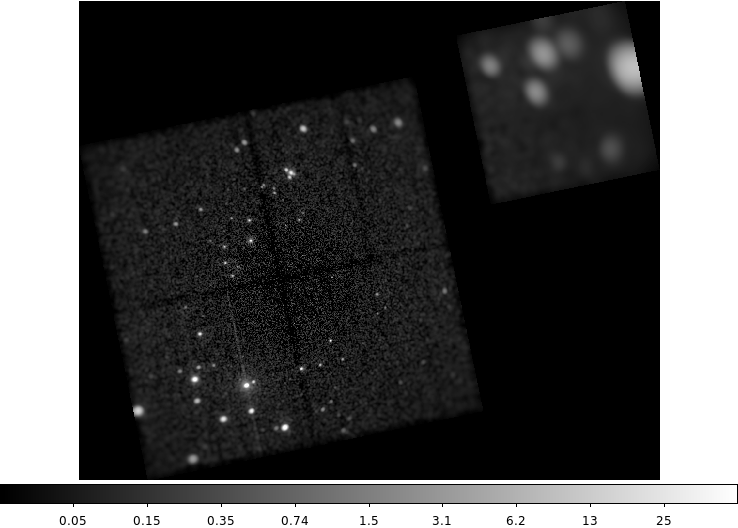

In [11]:
ds9 sm_img.fits -scale log -scale limits 0 50 -zoom to fit \
  -saveimage png ds9_03.png &
sleep 10
xpaset -p ds9 quit

display < ds9_03.png

# Cleanup


In [12]:
/bin/rm -f acisf*
